In [1]:
%pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.5-py3-none-any.whl size=12032 sha256=37af1ec5b0f86425de654b619848f2f746d73b6455f5a113a9b50d44c3967e2c
  Stored in directory: /home/amir-daneshmand/.cache/pip/wheels/be/33/77/b6bb14008fa79a2dd2b79d565e941d5faa2d7f7526e528345b
Successfully built minisom
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
dataset.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [5]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

In [6]:
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

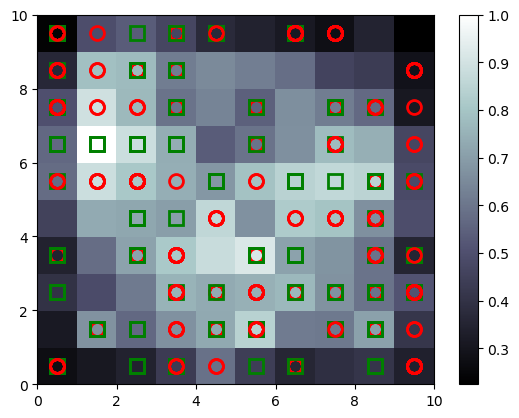

In [7]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()

markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [8]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(8,1)], mappings[(6,9)]), axis = 0)
frauds = sc.inverse_transform(frauds)
print(frauds)

[[1.5715750e+07 1.0000000e+00 2.0170000e+01 8.1700000e+00 2.0000000e+00
  6.0000000e+00 4.0000000e+00 1.9600000e+00 1.0000000e+00 1.0000000e+00
  1.4000000e+01 0.0000000e+00 2.0000000e+00 6.0000000e+01 1.5900000e+02]
 [1.5789201e+07 1.0000000e+00 1.8500000e+01 2.0000000e+00 2.0000000e+00
  3.0000000e+00 4.0000000e+00 1.5000000e+00 1.0000000e+00 1.0000000e+00
  2.0000000e+00 0.0000000e+00 2.0000000e+00 1.2000000e+02 3.0100000e+02]
 [1.5723884e+07 1.0000000e+00 3.6250000e+01 5.0000000e+00 2.0000000e+00
  8.0000000e+00 5.0000000e+00 2.5000000e+00 1.0000000e+00 1.0000000e+00
  6.0000000e+00 0.0000000e+00 2.0000000e+00 0.0000000e+00 3.6800000e+02]
 [1.5735837e+07 1.0000000e+00 5.2500000e+01 6.5000000e+00 2.0000000e+00
  4.0000000e+00 4.0000000e+00 6.2900000e+00 1.0000000e+00 1.0000000e+00
  1.5000000e+01 0.0000000e+00 2.0000000e+00 0.0000000e+00 1.1203000e+04]
 [1.5778290e+07 1.0000000e+00 2.5000000e+01 1.1250000e+01 2.0000000e+00
  8.0000000e+00 4.0000000e+00 2.5000000e+00 1.0000000e+00 1.